# Bitcoin Price Prediction (1 Month)

In [1]:
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('Bitcoin.csv')
df['Date'] = pd.to_datetime(df.Date)
df = df[df['Date'].isin(pd.date_range(start='2018-01-01', end='2018-12-22'))]
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True) #set Date as index

Train over 1/1/2018 to 11/30/2018 and predict Bitcoin prices for the rest of December

In [3]:
train = df[0:334]
test = df[334:]

## Bitcoin price from 1/1/2018 to 12/22/2018

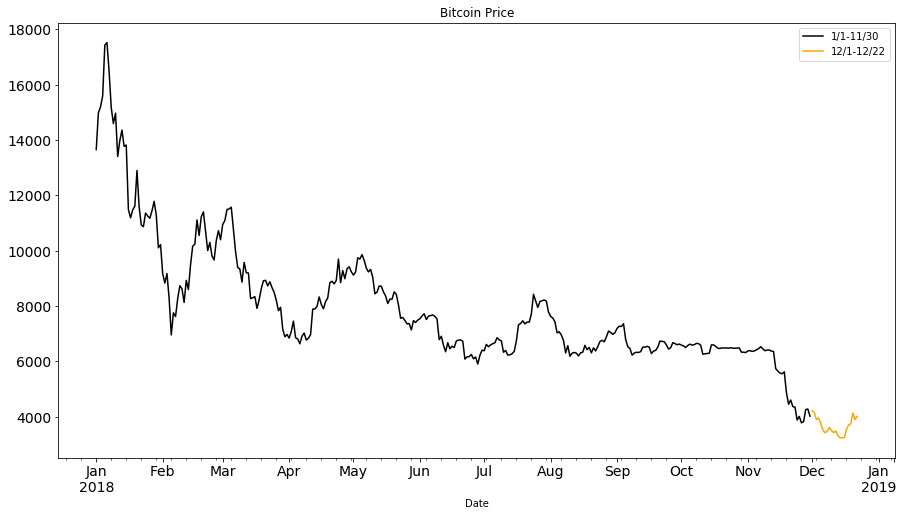

In [4]:
ax = train.plot(y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '1/1-11/30', color = "black")
test.plot(ax=ax, y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '12/1-12/22', color = "orange")
plt.show()

## Predicting from last known price

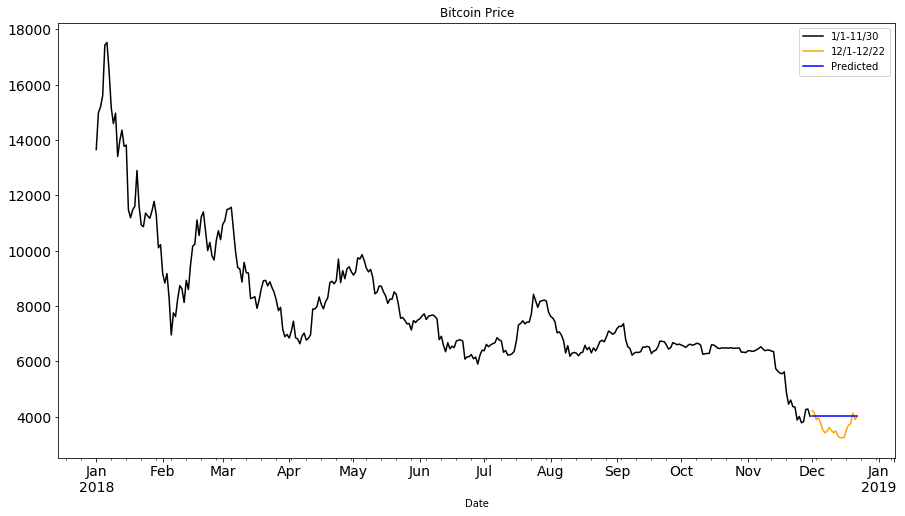

467.778135935286


In [6]:
last = np.asarray(train.Close)
y_hat = test.copy()
y_hat['last_price'] = last[len(last)-1]
ax = train.plot(y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '1/1-11/30', color = "black")
test.plot(ax=ax,  y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '12/1-12/22', color = "orange")
y_hat.plot(ax=ax, y = 'last_price', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.last_price))
print(rms)

## Average

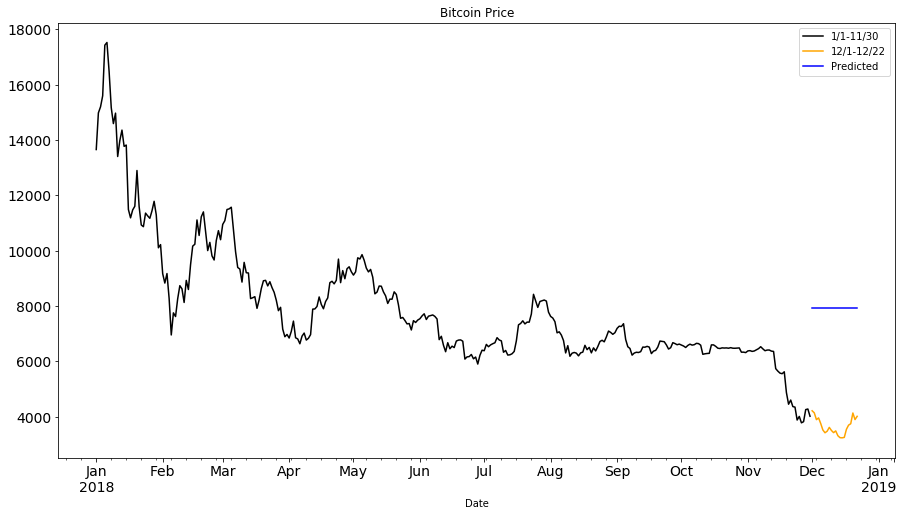

4282.241801701655


In [8]:
dd = np.asarray(train.Close)
y_hat = test.copy()
y_hat['avg_forecast'] = train['Close'].mean()
ax = train.plot(y = 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '1/1-11/30', color = "black")
test.plot(ax=ax, y= 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '12/1-12/22', color = "orange")
y_hat.plot(ax = ax, y = 'avg_forecast', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.avg_forecast))
print(rms)

## 7 Day Rolling Mean

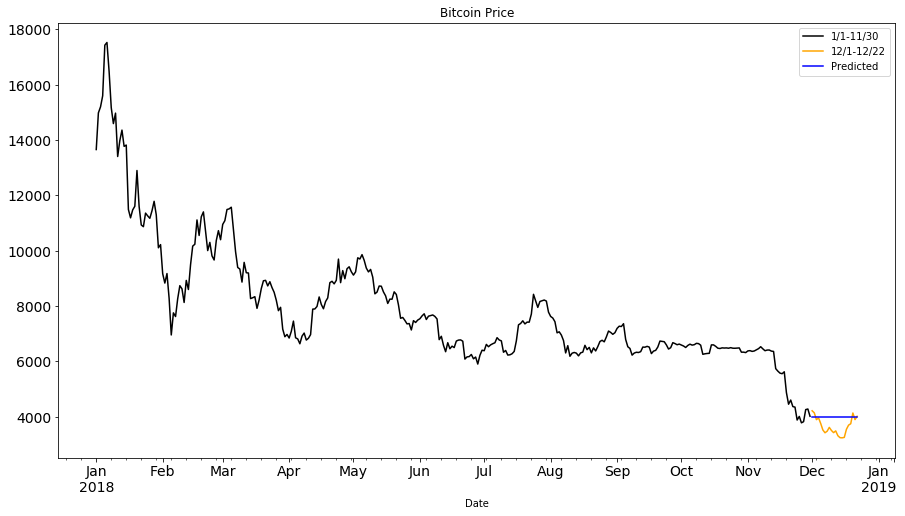

459.41728109199295


In [7]:
dd = np.asarray(train.Close)
y_hat= test.copy()
y_hat['moving_avg_forecast'] = train['Close'].rolling(7).mean().iloc[-1]
ax = train.plot(y = 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '1/1-11/30', color = "black")
test.plot(ax = ax, y = 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '12/1-12/22', color = "orange")
y_hat.plot(ax = ax, y = 'moving_avg_forecast',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.moving_avg_forecast))
print(rms)

## Simple Exponential Smoothing

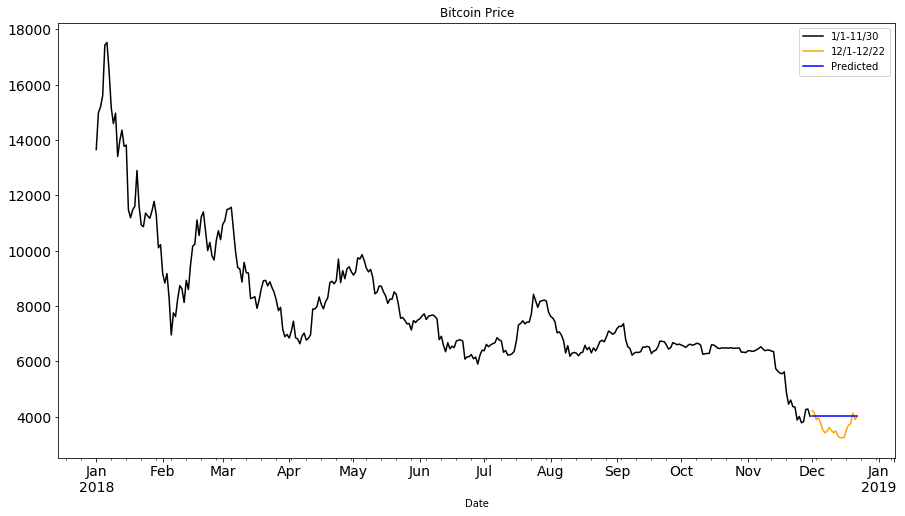

467.778135935286


In [9]:
y_hat = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit()
y_hat['SES'] = fit2.forecast(len(test))
ax = train.plot(y = 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '1/1-11/30', color = "black")
test.plot(ax=ax, y='Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '12/1-12/22', color = "orange")
y_hat.plot(ax=ax, y = 'SES', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.SES))
print(rms)

## Holt Linear Model

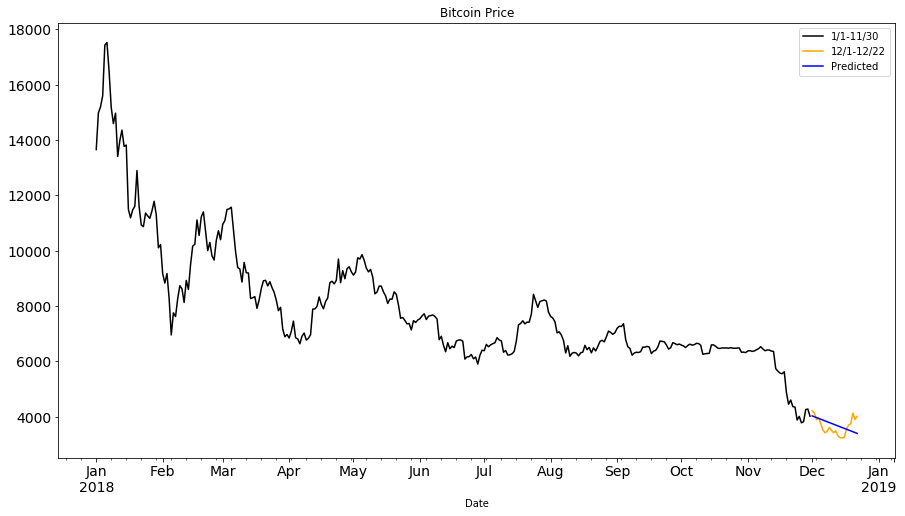

332.3325057520154


In [10]:
y_hat = test.copy()
fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level=0.6, smoothing_slope=0.2)
y_hat['Holt_linear'] = fit1.forecast(len(test))
ax = train.plot(y = 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '1/1-11/30', color = "black")
test.plot(ax=ax, y = 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '12/1-12/22', color = "orange")
y_hat.plot(ax=ax, y= 'Holt_linear', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.Holt_linear))
print(rms)

## Holt-Winters Seasonal Model

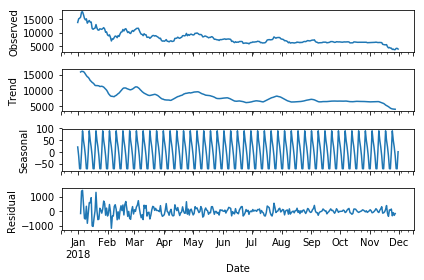

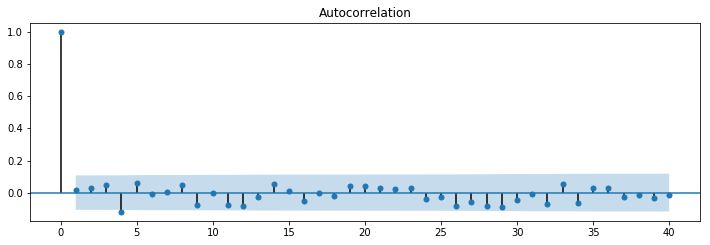

In [11]:
sm.tsa.seasonal_decompose(train.Close).plot()
result = sm.tsa.stattools.adfuller(train.Close)
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Close'].diff().dropna(), lags=40, ax=ax1)

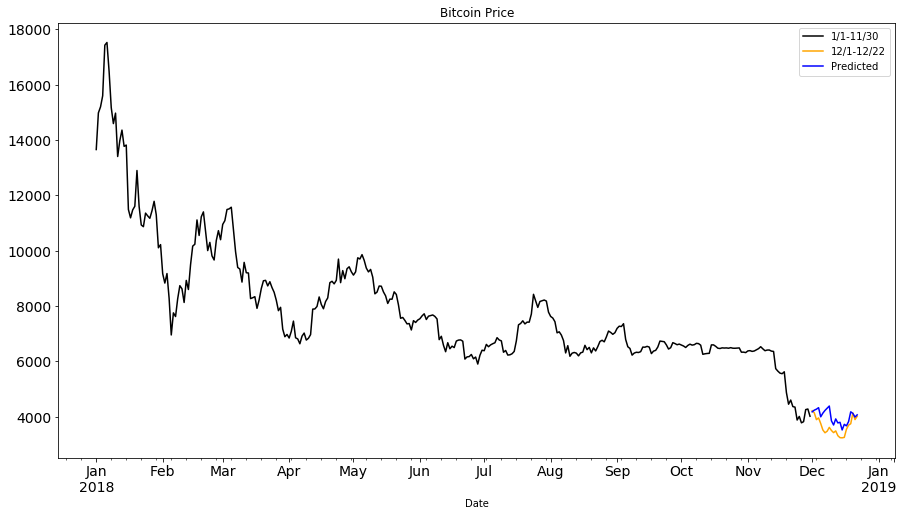

431.7676948502354


In [12]:
y_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=21 ,trend='add', seasonal='add',).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))
ax = train.plot(y= 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '1/1-11/30', color = "black")
test.plot(ax=ax, y = 'Close',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '12/1-12/22', color = "orange")
y_hat.plot(ax=ax, y = 'Holt_Winter',figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.Holt_Winter))
print(rms)

## Seasonal ARIMA Model

/home/dpatl/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/dpatl/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


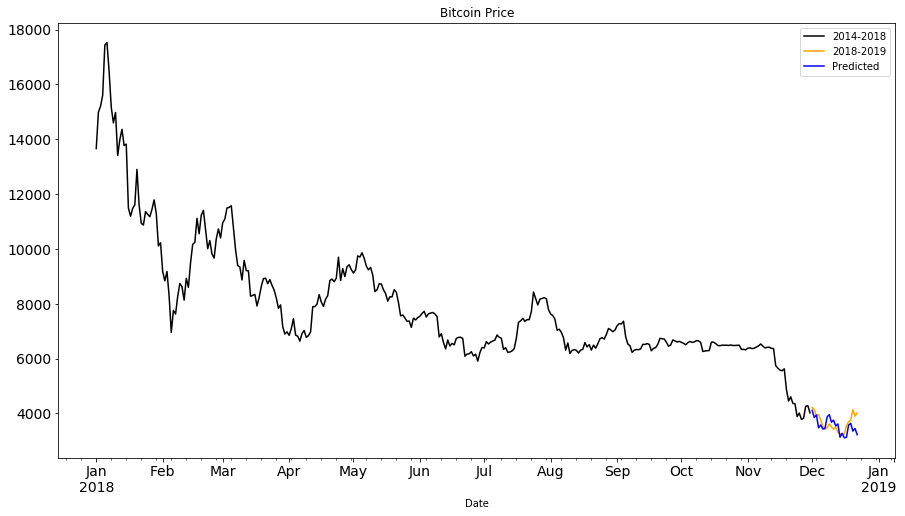

340.8258616190946


In [13]:
y_hat = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Close ,order=(4, 1, 4),seasonal_order=(0,1,0,10),  enforce_stationarity=False,
                                enforce_invertibility=False).fit()
y_hat['SARIMA'] = fit1.predict(start='2018-12-01', end='2018-12-22', dynamic=True)
ax = train.plot( y = 'Close', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2014-2018', color = "black")
test.plot(ax=ax,y = 'Close' ,figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = '2018-2019', color = "orange")
y_hat.plot(ax=ax, y = 'SARIMA', figsize=(15,8), title= 'Bitcoin Price', fontsize=14, label = 'Predicted', color = "blue")
plt.show()
rms = sqrt(mean_squared_error(test.Close, y_hat.SARIMA))
print(rms)
